<a href="https://colab.research.google.com/github/abhik718/Data-Science_Survival-Skills_HW_5/blob/main/DSSS9_short%20and%20main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install FlickrAPI

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 KB 3.1 MB/s eta 0:00:00


In [ ]:
from  flickrapi import FlickrAPI
import requests
from PIL import Image
from io import BytesIO

In [ ]:
import urllib.request
import os
from pathlib import Path
from google.colab import drive 
drive.mount('/content/drive')
path = '/content/drive/MyDrive/DSSS_9'

Mounted at /content/drive


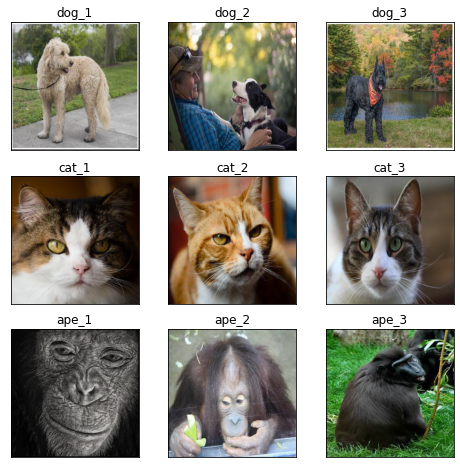

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(3, 3, figsize=(8, 8))

for i in range(3):
    for j in range(3):
        image1 = Image.open('/content/drive/MyDrive/DSSS_9/images/{0}_{1}.jpg'.format(keyword1, 0+j)) 
        image1 = image1.resize((256, 256))
        ax[0, j].imshow(image1)
        ax[0, j].set_title(keyword1 + f'_{1 + j}')

        image2 = Image.open('/content/drive/MyDrive/DSSS_9/images/{0}_{1}.jpg'.format(keyword2, 0+j)) 
        image2 = image2.resize((256, 256))
        ax[1, j].imshow(image2)
        ax[1, j].set_title(keyword2 + f'_{1 + j}')

        image3 = Image.open('/content/drive/MyDrive/DSSS_9/images/{0}_{1}.jpg'.format(keyword3, 0+j)) 
        image3 = image3.resize((256, 256))
        ax[2, j].imshow(image3)
        ax[2, j].set_title(keyword3 + f'_{1 + j}')

        ax[i, j].set_xticks([])
        ax[i, j].set_yticks([])

In [ ]:
personal_token = '5854608172:AAFcTPnDUk0ATkaJV3lXpxg1WQcGqhfC6y4'

In [ ]:
ping_url = 'https://api.telegram.org/bot'+str(personal_token)+'/getUpdates'
response = requests.get(ping_url).json()
response

NameError: ignored

In [ ]:
chat_id = response['result'][0]['message']['chat']['id']
chat_id

1194575664

In [ ]:
ping_url = 'https://api.telegram.org/bot'+str(personal_token)+'/sendMessage?'+\
            'chat_id='+str(chat_id)+\
            '&parse_mode=Markdown'+\
            '&text='+ 'Hello'

response = requests.get(ping_url)

In [ ]:
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds

In [ ]:
import pathlib
#dataset = 'https://drive.google.com/drive/my-drive'
#directory = tf.keras.utils.get_file('images', origin=demo_dataset, untar=True)
directory = '/content/drive/MyDrive/DSSS_9/train'
data_directory = pathlib.Path(directory)
data_directory

PosixPath('/content/drive/MyDrive/DSSS_9/train')

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
import tensorflow_datasets as tfds
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
def resnet_block(inputs, filters, strides=1):
    x = layers.Conv2D(filters, 3, strides=strides, padding='same')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)

    x = layers.Conv2D(filters, 3, padding='same')(x)
    x = layers.BatchNormalization()(x)

    shortcut = layers.Conv2D(filters, 1, strides=strides)(inputs)
    shortcut = layers.BatchNormalization()(shortcut)

    x = layers.add([x, shortcut])
    x = layers.Activation('relu')(x)
    return x

# Create the input layer
inputs = layers.Input(shape=(256, 256, 3))

# Add the first convolutional layer
x = layers.Conv2D(64, 7, strides=2, padding='same')(inputs)
x = layers.BatchNormalization()(x)
x = layers.Activation('relu')(x)
x = layers.MaxPool2D(3, strides=2, padding='same')(x)

# Add the ResNet blocks
for filters in [64, 128, 256, 512]:
    for _ in range(3):
        x = resnet_block(x, filters)

# Add the global average pooling layer
x = layers.GlobalAvgPool2D()(x)

# Add the output layer
outputs = layers.Dense(3, activation='softmax')(x)

# Create the model
model = tf.keras.Model(inputs, outputs)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Create the data generator
datagen = ImageDataGenerator(rescale=1./255)

train_folder_path = '/content/drive/MyDrive/DSSS_9/train'
val_folder_path = '/content/drive/MyDrive/DSSS_9/validation'
test_folder_path = '/content/drive/MyDrive/DSSS_9/test'

#Load the data
train_data = datagen.flow_from_directory(directory=train_folder_path,
                                        target_size=(256, 256),
                                        class_mode='categorical',
                                        batch_size=32)

# validation data part
val_datagen = ImageDataGenerator(rescale=1./255)
val_data = val_datagen.flow_from_directory(directory=val_folder_path,
                                           target_size=(256, 256),
                                           class_mode='categorical',
                                           batch_size=32)

# test data part
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(directory=test_folder_path,
                                             target_size=(256, 256),
                                             class_mode='categorical',
                                             batch_size=32)


In [ ]:
class BotCallback(tf.keras.callbacks.Callback):
    def __init__(self,personal_token):
        self.personal_token = personal_token
        self.ping_url = 'https://api.telegram.org/bot'+str(self.personal_token)+'/getUpdates'
        self.response = requests.get(self.ping_url).json()
        self.chat_id = self.response['result'][0]['message']['chat']['id']

    def send_message(self,message):
        self.ping_url = 'https://api.telegram.org/bot'+str(self.personal_token)+'/sendMessage?'+\
                        'chat_id='+str(self.chat_id)+\
                        '&parse_mode=Markdown'+\
                        '&text='+message
        self.response = requests.get(self.ping_url)
        return self.ping_url

    def on_train_begin(self, epoch_logs=None):
        keys = list(epoch_logs.keys())
        self.send_message("Starting training; got log keys: {}".format(keys))
    
    def on_train_end(self, epoch_logs=None):
        keys = list(epoch_logs.keys())
        self.send_message("Stop training; got log keys: {}".format(keys))

    def on_epoch_begin(self, epoch, epoch_logs=None):
        keys = list(epoch_logs.keys())
        self.send_message("Start epoch {}".format(epoch))

    def on_epoch_end(self, epoch, epoch_logs = None):
        # TODO
        keys = list(epoch_logs.keys())
        self.send_message("End Epoch: {}".format(epoch))
        pass

model.fit(train_data, epochs=10,callbacks=[BotCallback('5854608172:AAFcTPnDUk0ATkaJV3lXpxg1WQcGqhfC6y4')])